<a href="https://colab.research.google.com/github/hemchan-cyber/M.Tech-AI-Machine-Learning-Practical/blob/main/Q2_Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q2. Python program to import (or create) a dataset with missing values, display the count of missing values per column, and handle them using both imputation and dropping methods. Then, compare the dataset before and after handling missing values, and display the final cleaned dataset.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# 1. Loading of dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML Lab practice/2. handling missing values/Placement_Dataset.csv')
print ("---Initail Data Inspection---")
print (dataset.head())
print ("\nShape of orignal dataset:",dataset.shape)

---Initail Data Inspection---
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  

Shape of orignal dataset: (215, 15)


In [12]:
# 2. Checking for Missing Values
print("\n--- Count of Missing Values per Column ---")
print(dataset.isnull().sum())


--- Count of Missing Values per Column ---
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


/tmp/ipython-input-3009654023.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(dataset.salary)


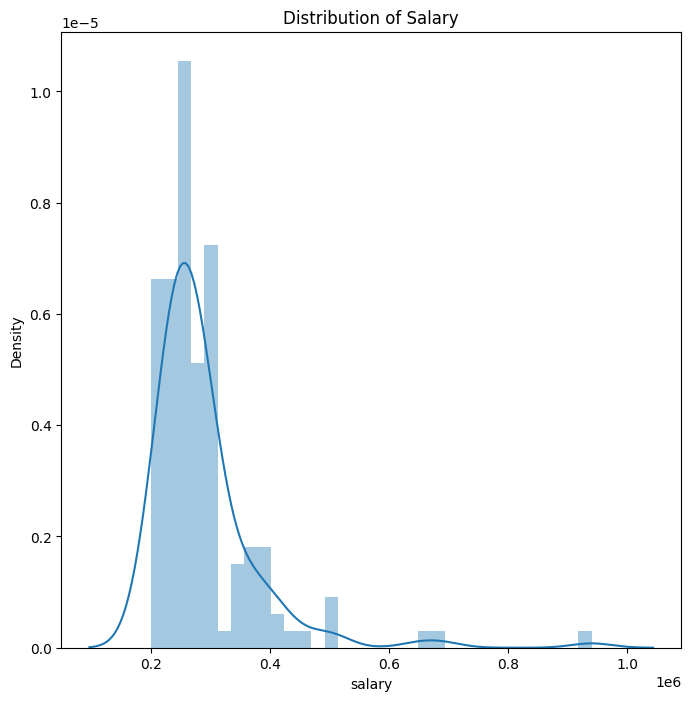

In [13]:
# 3. Analyzing Distribution to decide Imputation strategy
# We plot the 'salary' column to see if it is skewed
fig, ax = plt.subplots(figsize=(8,8))
sn.distplot(dataset.salary)
plt.title("Distribution of Salary")
plt.show()

In [14]:
# --- METHOD 1: IMPUTATION (Replacing Missing Values) ---
print("\n--- METHOD 1: Imputation using Central Tendencies ---")
print("Strategies considered: 1) Mean  2) Median  3) Mode")
# Since Salary is often skewed, Median is usually preferred.
# Here we replace the missing values with the Median.
dataset['salary'].fillna(dataset['salary'].median(), inplace=True)
# Verifying that null values are gone
print("Missing values in Salary after Median Imputation:", dataset['salary'].isnull().sum())


--- METHOD 1: Imputation using Central Tendencies ---
Strategies considered: 1) Mean  2) Median  3) Mode
Missing values in Salary after Median Imputation: 0


/tmp/ipython-input-4144505839.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(dataset['salary'].median(), inplace=True)


In [15]:
# --- METHOD 2: DROPPING (Removing Rows) ---
print("\n--- METHOD 2: Dropping Rows with Missing Values ---")
# Reloading the dataset fresh to demonstrate the second method
salary_dataset = pd.read_csv('/content/drive/MyDrive/ML Lab practice/2. handling missing values/Placement_Dataset.csv')
print("Shape before dropping:", salary_dataset.shape)
print("Missing values before dropping:\n", salary_dataset.isnull().sum())
# Dropping any row that has a missing value
salary_dataset = salary_dataset.dropna(how='any')
print("\nShape after dropping:", salary_dataset.shape)
print("Missing values after dropping (should be 0):", salary_dataset.isnull().sum().sum())


--- METHOD 2: Dropping Rows with Missing Values ---
Shape before dropping: (215, 15)
Missing values before dropping:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Shape after dropping: (148, 15)
Missing values after dropping (should be 0): 0
